In [376]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import warnings
%matplotlib inline

In [409]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import joblib
from datetime import datetime as dt

In [378]:
# Loading Data

train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')

Performing EDA

In [379]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      107833 non-null  object 
 1   DATOP   107833 non-null  object 
 2   FLTID   107833 non-null  object 
 3   DEPSTN  107833 non-null  object 
 4   ARRSTN  107833 non-null  object 
 5   STD     107833 non-null  object 
 6   STA     107833 non-null  object 
 7   STATUS  107833 non-null  object 
 8   AC      107833 non-null  object 
 9   target  107833 non-null  float64
dtypes: float64(1), object(9)
memory usage: 8.2+ MB


In [380]:
train_df.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [381]:
train_df.tail()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0
107832,train_id_107832,2018-11-13,UG 0002,TUN,DJE,2018-11-13 06:15:00,2018-11-13 07.05.00,SCH,TU CR9ISA,0.0


In [382]:
train_df.shape


(107833, 10)

<Axes: >

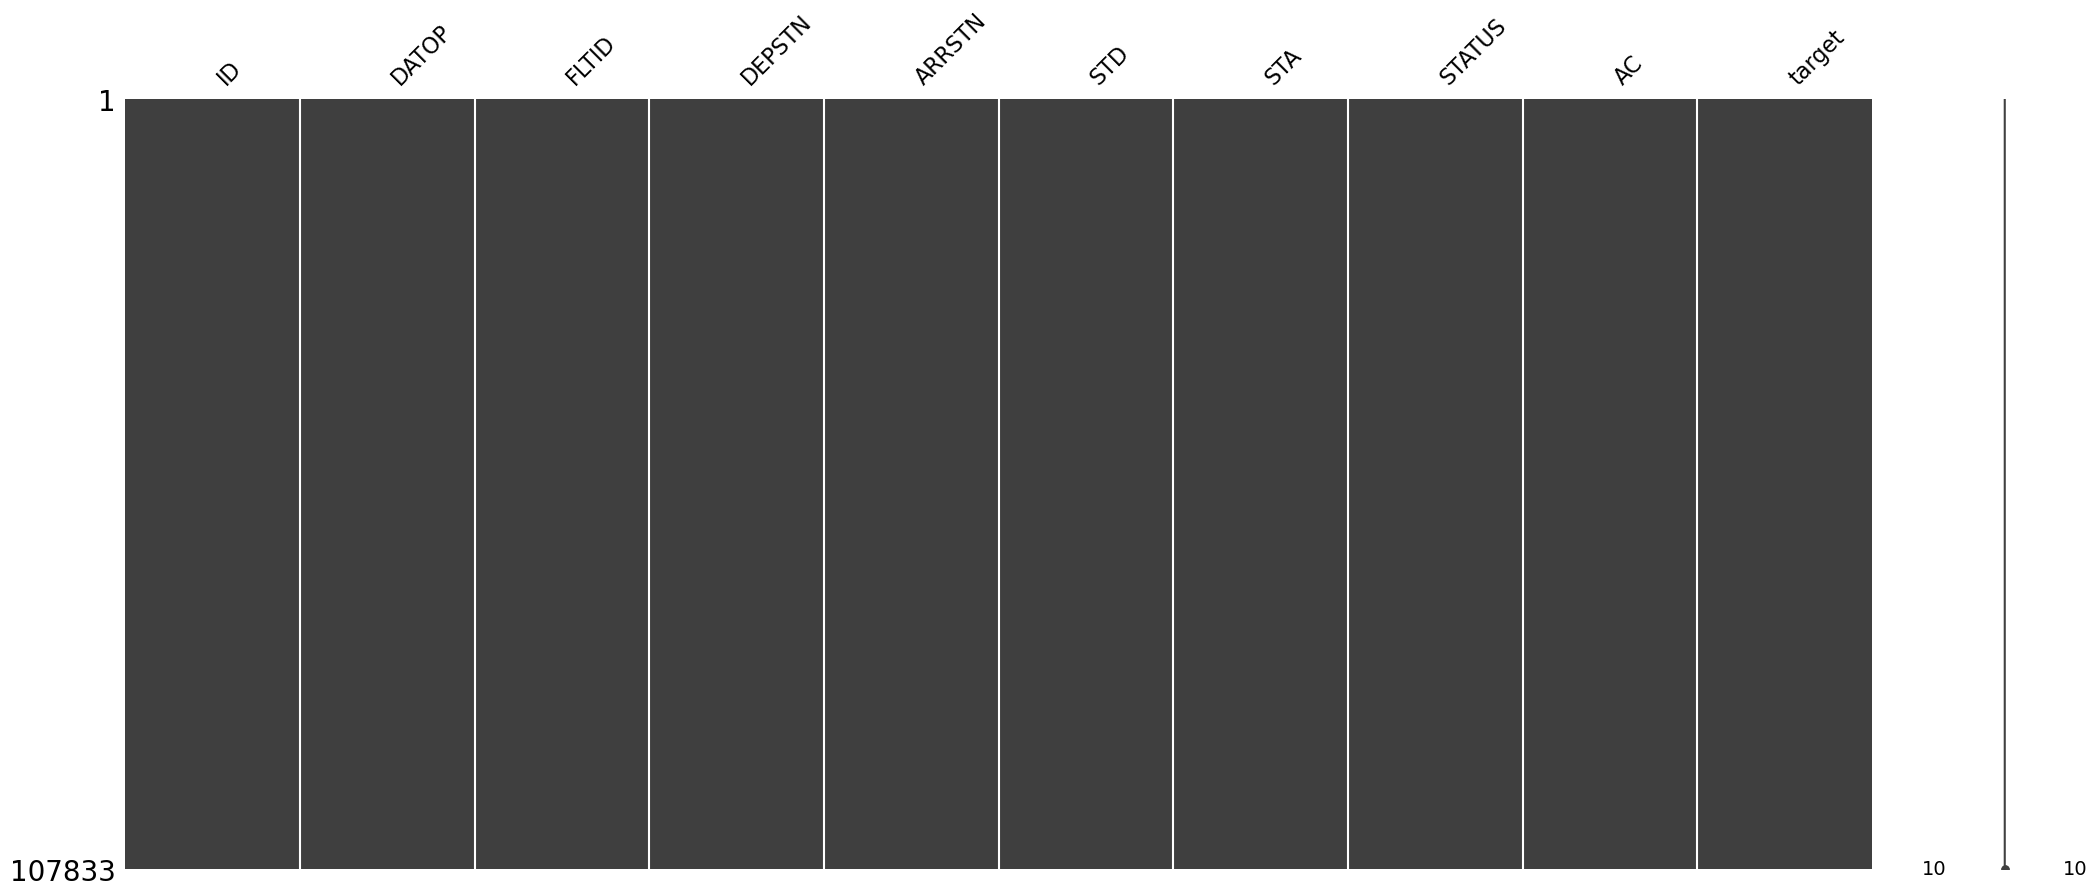

In [383]:
#visualizing missing data
msn.matrix(train_df)

In [384]:
train_df.isnull().sum()


ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64

In [385]:
#Duplicated values
data_dup = train_df.duplicated().any()
data_dup

False

Dividing the labeled dataset into train and test

In [386]:
train=train_df.iloc[ :75483, :]
test=train_df.iloc[75484: , :]

In [387]:
train.shape, test.shape

((75483, 10), (32349, 10))

Encoding DEPSTN ARRSTN STATUS columns

In [388]:
train['DEPSTN'].nunique(), train['ARRSTN'].nunique()

(112, 111)

In [389]:
train.DEPSTN=train.DEPSTN.astype('category').cat.codes
train

C:\Users\mrRon_\AppData\Local\Temp\ipykernel_13652\1362848128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.DEPSTN=train.DEPSTN.astype('category').cat.codes


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,26,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,75,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,106,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,31,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,106,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...,...
75478,train_id_75478,2018-02-12,TU 0527,35,TUN,2018-02-12 15:45:00,2018-02-12 18.25.00,ATA,TU 736IOL,10.0
75479,train_id_75479,2018-02-12,TU 0881,5,TUN,2018-02-12 16:55:00,2018-02-12 19.45.00,ATA,TU 32AIMN,25.0
75480,train_id_75480,2018-02-12,TU 0607,68,LIS,2018-02-12 17:25:00,2018-02-12 18.45.00,ATA,TU 32AIMF,43.0
75481,train_id_75481,2018-02-12,TU 0723,85,TUN,2018-02-12 18:30:00,2018-02-12 20.55.00,ATA,TU 32AIMH,10.0


In [390]:
train.ARRSTN=train.ARRSTN.astype('category').cat.codes
train

C:\Users\mrRon_\AppData\Local\Temp\ipykernel_13652\206772843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.ARRSTN=train.ARRSTN.astype('category').cat.codes


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,26,105,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,75,105,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,106,50,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,31,81,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,106,3,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...,...
75478,train_id_75478,2018-02-12,TU 0527,35,105,2018-02-12 15:45:00,2018-02-12 18.25.00,ATA,TU 736IOL,10.0
75479,train_id_75479,2018-02-12,TU 0881,5,105,2018-02-12 16:55:00,2018-02-12 19.45.00,ATA,TU 32AIMN,25.0
75480,train_id_75480,2018-02-12,TU 0607,68,63,2018-02-12 17:25:00,2018-02-12 18.45.00,ATA,TU 32AIMF,43.0
75481,train_id_75481,2018-02-12,TU 0723,85,105,2018-02-12 18:30:00,2018-02-12 20.55.00,ATA,TU 32AIMH,10.0


In [391]:
le=LabelEncoder()
train['STATUS']=le.fit_transform(train['STATUS'])
train

C:\Users\mrRon_\AppData\Local\Temp\ipykernel_13652\2240274575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['STATUS']=le.fit_transform(train['STATUS'])


,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,26,105,2016-01-03 10:30:00,2016-01-03 12.55.00,0,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,75,105,2016-01-13 15:05:00,2016-01-13 16.55.00,0,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,106,50,2016-01-16 04:10:00,2016-01-16 06.45.00,0,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,31,81,2016-01-17 14:10:00,2016-01-17 17.00.00,0,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,106,3,2016-01-17 14:30:00,2016-01-17 15.50.00,0,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...,...
75478,train_id_75478,2018-02-12,TU 0527,35,105,2018-02-12 15:45:00,2018-02-12 18.25.00,0,TU 736IOL,10.0
75479,train_id_75479,2018-02-12,TU 0881,5,105,2018-02-12 16:55:00,2018-02-12 19.45.00,0,TU 32AIMN,25.0
75480,train_id_75480,2018-02-12,TU 0607,68,63,2018-02-12 17:25:00,2018-02-12 18.45.00,0,TU 32AIMF,43.0
75481,train_id_75481,2018-02-12,TU 0723,85,105,2018-02-12 18:30:00,2018-02-12 20.55.00,0,TU 32AIMH,10.0


In [392]:
#converting to datetime data types
train['DATOP']=pd.to_datetime(train['DATOP'])

C:\Users\mrRon_\AppData\Local\Temp\ipykernel_13652\749659254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['DATOP']=pd.to_datetime(train['DATOP'])


In [393]:
train['STD']=pd.to_datetime(train['STD'])

C:\Users\mrRon_\AppData\Local\Temp\ipykernel_13652\2237893235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['STD']=pd.to_datetime(train['STD'])


In [394]:
train['STA']=pd.to_datetime(train['STA'], format='%Y-%m-%d %H.%M.%S')

C:\Users\mrRon_\AppData\Local\Temp\ipykernel_13652\1173465239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['STA']=pd.to_datetime(train['STA'], format='%Y-%m-%d %H.%M.%S')


In [395]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75483 entries, 0 to 75482
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      75483 non-null  object        
 1   DATOP   75483 non-null  datetime64[ns]
 2   FLTID   75483 non-null  object        
 3   DEPSTN  75483 non-null  int8          
 4   ARRSTN  75483 non-null  int8          
 5   STD     75483 non-null  datetime64[ns]
 6   STA     75483 non-null  datetime64[ns]
 7   STATUS  75483 non-null  int32         
 8   AC      75483 non-null  object        
 9   target  75483 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int32(1), int8(2), object(3)
memory usage: 4.5+ MB


In [396]:
#dropping some columns
train=train.drop(['ID','FLTID','AC'], axis=1)
train.head()

,DATOP,DEPSTN,ARRSTN,STD,STA,STATUS,target
0,2016-01-03,26,105,2016-01-03 10:30:00,2016-01-03 12:55:00,0,260.0
1,2016-01-13,75,105,2016-01-13 15:05:00,2016-01-13 16:55:00,0,20.0
2,2016-01-16,106,50,2016-01-16 04:10:00,2016-01-16 06:45:00,0,0.0
3,2016-01-17,31,81,2016-01-17 14:10:00,2016-01-17 17:00:00,0,0.0
4,2016-01-17,106,3,2016-01-17 14:30:00,2016-01-17 15:50:00,0,22.0


In [397]:
#setting DATOP as index
#train=train.set_index(['DATOP'])
#train.head()

Random forest

In [398]:
#extracting features from datetime columns
train['Year'] = train['DATOP'].dt.year
train['DATOP_Month'] = train['DATOP'].dt.month
train['DATOP_Day'] = train['DATOP'].dt.day
train['STD_Month'] = train['STD'].dt.month
train['STD_Day'] = train['STD'].dt.day
train['STA_Month'] = train['STA'].dt.month
train['STA_Day'] = train['STA'].dt.day
train=train.drop(['DATOP','STD','STA'], axis=1)
train.head()



,DEPSTN,ARRSTN,STATUS,target,Year,DATOP_Month,DATOP_Day,STD_Month,STD_Day,STA_Month,STA_Day
0,26,105,0,260.0,2016,1,3,1,3,1,3
1,75,105,0,20.0,2016,1,13,1,13,1,13
2,106,50,0,0.0,2016,1,16,1,16,1,16
3,31,81,0,0.0,2016,1,17,1,17,1,17
4,106,3,0,22.0,2016,1,17,1,17,1,17


In [407]:
train.describe()

,DEPSTN,ARRSTN,STATUS,target,Year,DATOP_Month,DATOP_Day,STD_Month,STD_Day,STA_Month,STA_Day
count,75483.000000,75483.000000,75483.000000,75483.000000,75483.000000,75483.000000,75483.000000,75483.000000,75483.000000,75483.000000,75483.000000
mean,76.398739,75.698727,0.501517,43.307221,2016.609064,6.525125,15.786045,6.525125,15.786045,6.525880,15.786561
std,32.951552,32.545987,1.311677,107.021332,0.603581,3.417015,8.912664,3.417015,8.912664,3.416846,8.913322
min,0.000000,0.000000,0.000000,0.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,50.000000,50.000000,0.000000,0.000000,2016.000000,4.000000,8.000000,4.000000,8.000000,4.000000,8.000000
50%,85.000000,84.000000,0.000000,12.000000,2017.000000,7.000000,16.000000,7.000000,16.000000,7.000000,16.000000
75%,106.000000,105.000000,0.000000,39.000000,2017.000000,9.000000,24.000000,9.000000,24.000000,9.000000,24.000000
max,111.000000,110.000000,4.000000,3451.000000,2018.000000,12.000000,31.000000,12.000000,31.000000,12.000000,31.000000


In [399]:
#converting to arrays
# Labels are the values we want to predict
labels = np.array(train['target'])
# Remove the labels from the features
# axis 1 refers to the columns
features= train.drop('target', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [400]:
# Using Skicit-learn to split data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [401]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (56612, 10)
Training Labels Shape: (56612,)
Testing Features Shape: (18871, 10)
Testing Labels Shape: (18871,)


In [402]:
# Instantiating model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Training the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [413]:
#Prediction
# Using the forest's predict method on the test data
predictions = rf.predict(test_features)

# Print out the mean squared error (mse)
print('Root Mean squared Error:', np.sqrt(mean_squared_error(test_labels, predictions)))


Root Mean squared Error: 110.666894997395
